# Gelquant example usage

In [1]:
from gelquant import gelquant
%matplotlib inline

### Import and crop gel images as desired.

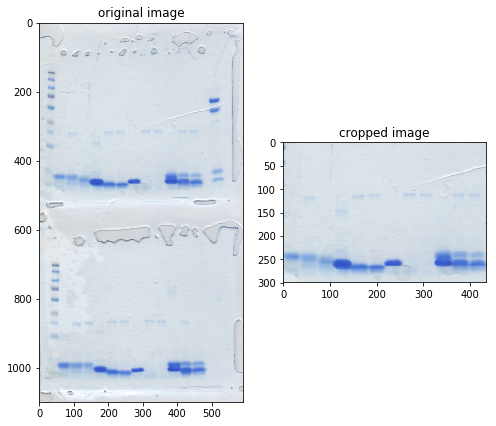

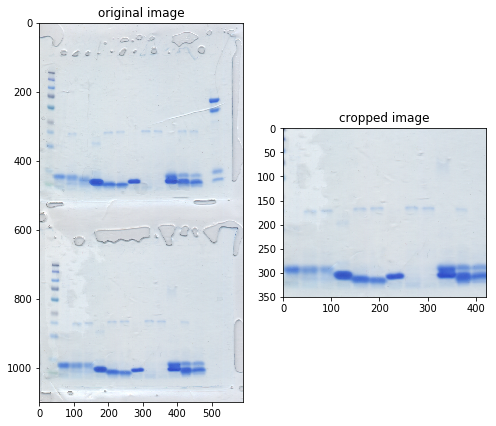

In [2]:
# four digits correspond to (x1,y1) and (x2,y2) points between which the gel gets cropped

image1 = gelquant.image_cropping("gel-example.png", 40, 200, 475, 500)

# you can process more than one replicate by simply repeating the cropping call, 
# yielding error bars on your final plot

image2 = gelquant.image_cropping("gel-example.png", 53, 700, 475, 1050)

### Parse and set bounds on quantified peaks in gel lanes

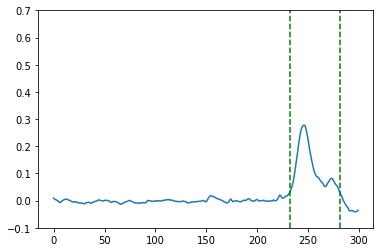

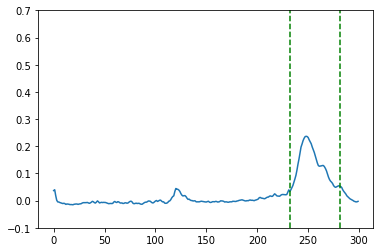

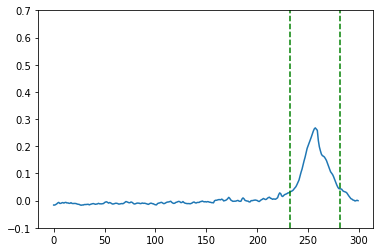

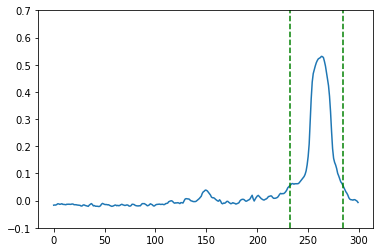

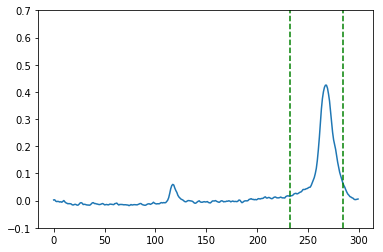

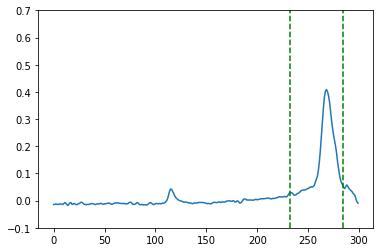

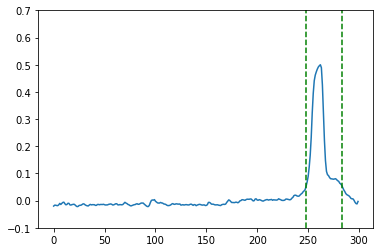

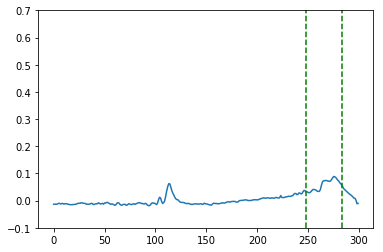

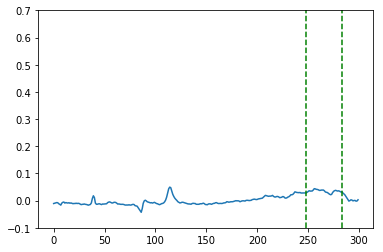

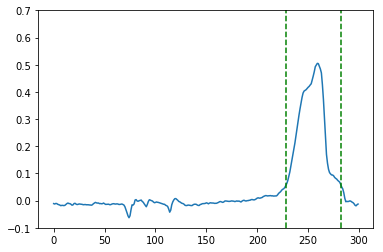

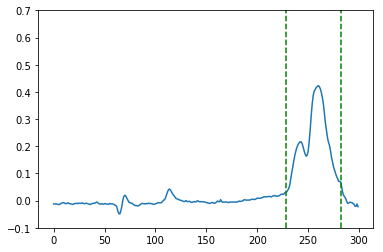

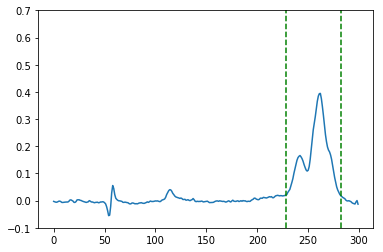

In [3]:
# the example dataset consists of 4 different proteins exposed to proteinase K for 0, 5, and 30 minutes.
# provide the lane parser with the number of lanes and the number of different proteins - here 12 lanes and 4 proteins.
# Finally, provide a baseline range for every lane - these values correspond to the y values in the cropped image.
# plot_output optionally plots your peaks and bounds if you'd like to visually inspect these results.

data1, bounds1 = gelquant.lane_parser(image1, 12, 4, 175, 200, plot_output=True)
data2, bounds2 = gelquant.lane_parser(image2, 12, 4, 200, 250)

### Integrate peaks and plot summary data

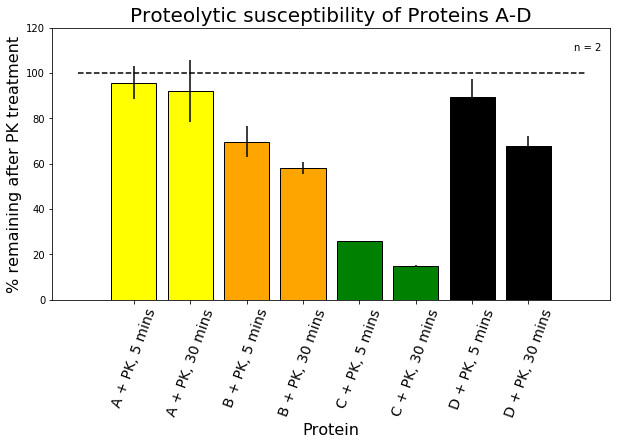

In [8]:
# pipe the data and calculated band boundaries into the gelquant area integrator.
# once again, provide the number of unique protein groups.

percentages1 = gelquant.area_integrator(data1, bounds1, 4)
percentages2 = gelquant.area_integrator(data2, bounds2, 4)

# for replicates, such as the two we have in the example images, you can define the dataset as follows:

datasets = [percentages1, percentages2]

# specify labels and a list of colors for your summary plot. 
# The 0 time point is omitted automatically since the purpose of this dataset was 
# to quantify % protein remaining after protease treatment. 

labels = ["A + PK, 5 mins", "A + PK, 30 mins", "B + PK, 5 mins", "B + PK, 30 mins", 
          "C + PK, 5 mins", "C + PK, 30 mins", "D + PK, 5 mins", "D + PK, 30 mins"]
colorlist = ["yellow", "yellow", "orange", "orange", "green", "green", "black", "black"]

# pipe the datasets, labels, and colorlist into summary plotter and view your results!
 
df = gelquant.summary_plotter(datasets, labels, colorlist)